This notebook looks at the shape data and plots some distributions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pickle
import pandas as pd
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [3]:
data_dir = '../outputs/tng-100/'

Read in the 3D shape classifications.

In [4]:
file = [ f for f in os.listdir(data_dir) if f.startswith('shape100_')][0]
with open('%s/%s' % (data_dir, file), 'rb') as f:
    shape100 = pickle.load(f)

Read in the 3D shape params data, and make some plots.

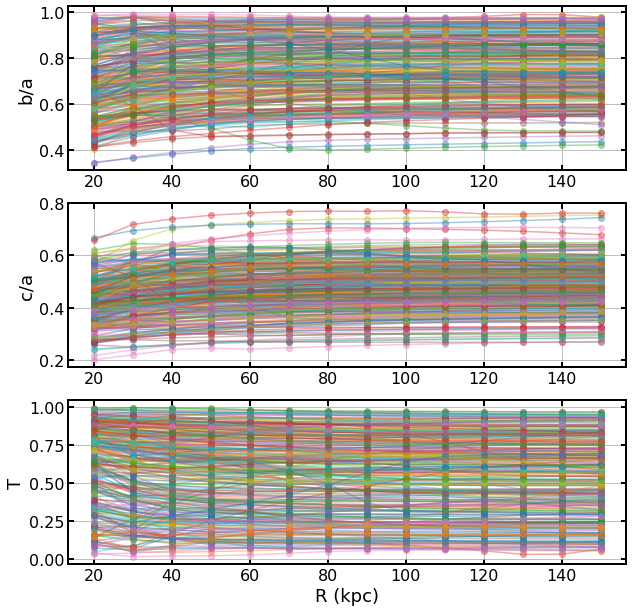

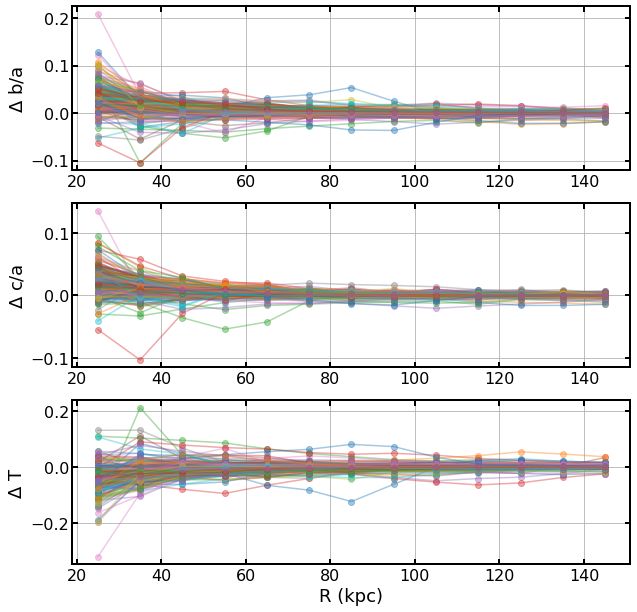

In [5]:
nrows, ncols = 3, 1
fig, axes = plt.subplots(nrows, ncols)
plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.9)

fig2, axes2 = plt.subplots(nrows, ncols)
plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.9)

# loop over the local foders; each folder is for a specific halo
for i, folder in enumerate([f for f in os.listdir(data_dir) if f.startswith('TNG')]):
    # ---------------------------------------------------------------------
    # now read in the data produced from my version
    file = [ f for f in os.listdir('%s/%s' % (data_dir, folder)) if f.startswith('shape_')]
    if len(file) == 1:
        file = file[0]
        with open('%s/%s/%s' % (data_dir, folder, file), 'rb') as f:
            data_now = pickle.load(f)

        axes[0].plot( data_now['Rstar'], data_now['b/a'], 'o-', alpha=0.4)
        axes[1].plot( data_now['Rstar'], data_now['c/a'], 'o-',alpha=0.4)
        T = (1 -  data_now['b/a'] ** 2 ) / (1 -  data_now['c/a'] ** 2 )
        axes[2].plot( data_now['Rstar'], T, 'o-',alpha=0.4)
        
        rmean = ( data_now['Rstar'][:-1] +  data_now['Rstar'][1:]) / 2
        
        axes2[0].plot( rmean, np.diff( data_now['b/a'] ), 'o-',alpha=0.4)
        axes2[1].plot( rmean, np.diff( data_now['c/a'] ), 'o-',alpha=0.4)
        axes2[2].plot( rmean, np.diff( T ), 'o-',alpha=0.4)
    else:
        print('Somethings wrong.')
    
axes[0].set_ylabel('b/a')
axes[1].set_ylabel('c/a')
axes[2].set_ylabel('T')
axes[2].set_xlabel('R (kpc)')
fig.set_size_inches(10, 10)

axes2[0].set_ylabel(r'$\Delta$ b/a')
axes2[1].set_ylabel(r'$\Delta$ c/a')
axes2[2].set_ylabel(r'$\Delta$ T')
axes2[2].set_xlabel('R (kpc)')
fig2.set_size_inches(10, 10)

Remake the figs above, now color-coding by 3D shape classifications.

In [6]:
colors = {'P': 'r', 'O': 'b', 'S': 'k', 'T': 'c'}

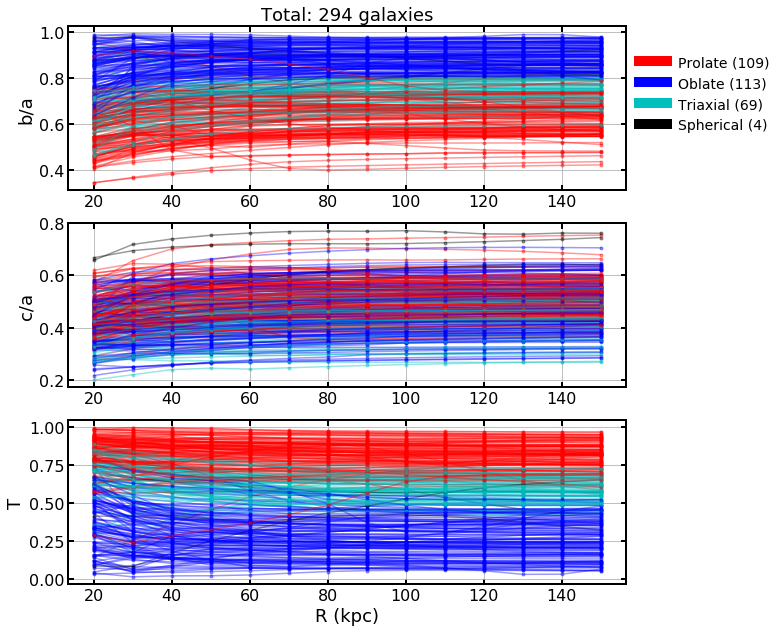

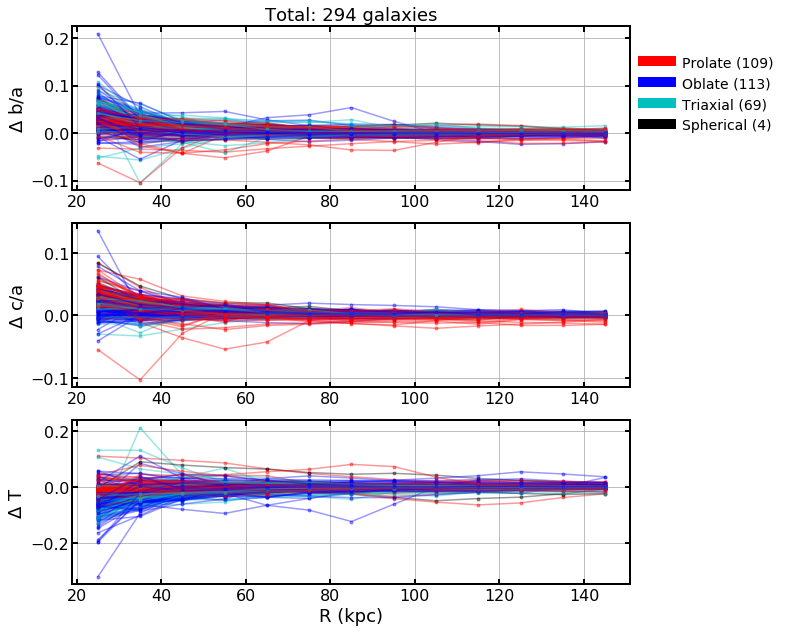

In [7]:
nrows, ncols = 3, 1
fig, axes = plt.subplots(nrows, ncols)
plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.9)

fig2, axes2 = plt.subplots(nrows, ncols)
plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.9)

counter_p, counter_o, counter_s, counter_t = 0, 0, 0, 0
# loop over the local foders; each folder is for a specific halo
for i, folder in enumerate([f for f in os.listdir(data_dir) if f.startswith('TNG')]):
    haloId = int(folder.split('halo')[-1].split('_')[0])
    ind = np.where(np.array( shape100['haloId'] ) == haloId)[0]
    shape_class = np.array(shape100['shape'])[ind][0]
    if shape_class == 'P': counter_p += 1
    if shape_class == 'O': counter_o += 1
    if shape_class == 'S': counter_s += 1
    if shape_class == 'T': counter_t += 1
    # ---------------------------------------------------------------------
    # now read in the data produced from my version
    file = [ f for f in os.listdir('%s/%s' % (data_dir, folder)) if f.startswith('shape_')]
    if len(file) == 1:
        file = file[0]
        with open('%s/%s/%s' % (data_dir, folder, file), 'rb') as f:
            data_now = pickle.load(f)

        axes[0].plot( data_now['Rstar'], data_now['b/a'], '.-', alpha=0.4, color=colors[shape_class])
        axes[1].plot( data_now['Rstar'], data_now['c/a'], '.-', alpha=0.4, color=colors[shape_class])
        T = (1 -  data_now['b/a'] ** 2 ) / (1 -  data_now['c/a'] ** 2 )
        axes[2].plot( data_now['Rstar'], T, '.-',alpha=0.4, color=colors[shape_class])
        
        rmean = ( data_now['Rstar'][:-1] +  data_now['Rstar'][1:]) / 2
        
        axes2[0].plot( rmean, np.diff( data_now['b/a'] ), '.-',alpha=0.4, color=colors[shape_class])
        axes2[1].plot( rmean, np.diff( data_now['c/a'] ), '.-',alpha=0.4, color=colors[shape_class])
        axes2[2].plot( rmean, np.diff( T ), '.-',alpha=0.4, color=colors[shape_class])
    else:
        print('Somethings wrong.')

axes[0].set_title('Total: %s galaxies' % i)
axes[0].set_ylabel('b/a')
axes[1].set_ylabel('c/a')
axes[2].set_ylabel('T')
axes[2].set_xlabel('R (kpc)')
fig.set_size_inches(10, 10)
# add legend
custom_lines = [Line2D([0], [0], color=colors['P'], lw=10),
                Line2D([0], [0], color=colors['O'], lw=10),
                Line2D([0], [0], color=colors['T'], lw=10),
                Line2D([0], [0], color=colors['S'], lw=10)]
axes[0].legend(custom_lines,
               ['Prolate (%s)' % counter_p,
                'Oblate (%s)' % counter_o,
                'Triaxial (%s)' % counter_t,
                'Spherical (%s)' % counter_s],
               bbox_to_anchor=(1, 0.9), frameon=False)

axes2[0].set_title('Total: %s galaxies' % i)
axes2[0].set_ylabel(r'$\Delta$ b/a')
axes2[1].set_ylabel(r'$\Delta$ c/a')
axes2[2].set_ylabel(r'$\Delta$ T')
axes2[2].set_xlabel('R (kpc)')
fig2.set_size_inches(10, 10)
# add legend
custom_lines = [Line2D([0], [0], color=colors['P'], lw=10),
                Line2D([0], [0], color=colors['O'], lw=10),
                Line2D([0], [0], color=colors['T'], lw=10),
                Line2D([0], [0], color=colors['S'], lw=10)]
axes2[0].legend(custom_lines,
               ['Prolate (%s)' % counter_p,
                'Oblate (%s)' % counter_o,
                'Triaxial (%s)' % counter_t,
                'Spherical (%s)' % counter_s],
               bbox_to_anchor=(1, 0.9), frameon=False)